## 1. Feature scaling is important for the k-means algorithm because it normalize the impact of features to the inertia. The inertia is calculated using distances. If features have different scales, the features with large scale will dominate the distance calculation. Feature scaling normalize features to the same scale so that normalize the impact.

## 2.e

## 3. In k-means algorithm, the number of iterations for the cluster centroids to converge to the final centroids depends on the initial choices. If the initial choices are far away from the final centroids, the number of iteration will increase a lot. If the predetermined number of iteration is set too low, the outcome of the algorithm may be not the optimum centroids.

In [1]:
## 4.a
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'Mall_Customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
customers = pd.read_csv(file_content_stream)
customers = customers.dropna()
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## 4.b
## Scaling variables to 0-1 scale
scaler = MinMaxScaler()

customers[['Age 0-1', 'Annual Income (k$) 0-1']] = scaler.fit_transform(customers[['Age', 'Annual Income (k$)']])
customers['Gender 0-1'] = np.where(customers['Gender'] == 'Male', 1, 0)
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age 0-1,Annual Income (k$) 0-1,Gender 0-1
0,1,Male,19,15,39,0.019231,0.000000,1
1,2,Male,21,15,81,0.057692,0.000000,1
2,3,Female,20,16,6,0.038462,0.008197,0
3,4,Female,23,16,77,0.096154,0.008197,0
4,5,Female,31,17,40,0.250000,0.016393,0


In [4]:
## 4.c
## Lists to store scores
ch_scores = list()
db_scores = list()
sl_scores = list()

for i in range(2, 11):
    
    ## Clustering the data
    kmeans_md = KMeans(n_clusters = i, init = 'k-means++', n_init = 20).fit(customers[['Gender 0-1', 'Age 0-1', 'Annual Income (k$) 0-1']])
    labels = kmeans_md.labels_
    
    ## Computing the scores
    ch_scores.append(calinski_harabasz_score(customers[['Gender 0-1', 'Age 0-1', 'Annual Income (k$) 0-1']], labels))
    db_scores.append(davies_bouldin_score(customers[['Gender 0-1', 'Age 0-1', 'Annual Income (k$) 0-1']], labels))
    sl_scores.append(silhouette_score(customers[['Gender 0-1', 'Age 0-1', 'Annual Income (k$) 0-1']], labels))

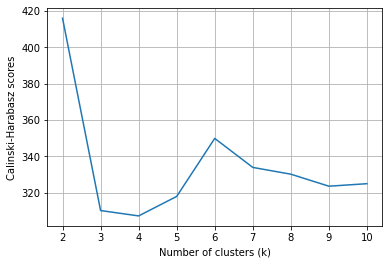

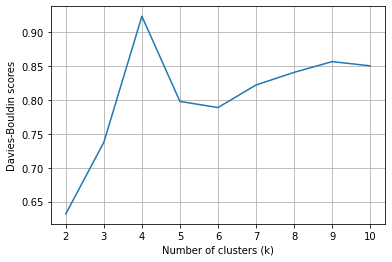

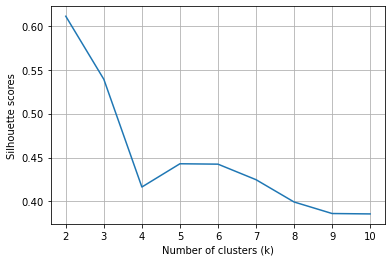

In [5]:
## Visualizing the Calinski-Harabasz scores
plt.plot(range(2, 11), ch_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz scores')
plt.grid()
plt.show()

## Visualizing the Davies-Bouldin scores
plt.plot(range(2, 11), db_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin scores')
plt.grid()
plt.show()

## Visualizing the Silhouette scores
plt.plot(range(2, 11), sl_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.grid()
plt.show()

In [6]:
## 2 clusters are enough for this dataset

In [9]:
## 4.d
## Clustering the dataset into 2 clusters
kmeans_md = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20).fit(customers[['Gender 0-1', 'Age 0-1', 'Annual Income (k$) 0-1']])

In [10]:
## 4.e
## Appending cluster labels
customers['cluster'] = kmeans_md.labels_
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age 0-1,Annual Income (k$) 0-1,Gender 0-1,cluster
0,1,Male,19,15,39,0.019231,0.000000,1,0
1,2,Male,21,15,81,0.057692,0.000000,1,0
2,3,Female,20,16,6,0.038462,0.008197,0,1
3,4,Female,23,16,77,0.096154,0.008197,0,1
4,5,Female,31,17,40,0.250000,0.016393,0,1


In [11]:
## Cluster 0
cluster_0 = customers[customers['cluster'] == 0].reset_index(drop = True)
cluster_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age 0-1,Annual Income (k$) 0-1,Gender 0-1,cluster
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.0
mean,104.238636,39.806818,62.227273,48.511364,0.419362,0.387109,1.0,0.0
std,57.483830,15.514812,26.638373,27.896770,0.298362,0.218347,0.0,0.0
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000,1.0,0.0
25%,59.500000,27.750000,45.500000,24.500000,0.187500,0.250000,1.0,0.0
50%,106.500000,37.000000,62.500000,50.000000,0.365385,0.389344,1.0,0.0
75%,151.250000,50.500000,78.000000,70.000000,0.625000,0.516393,1.0,0.0
max,200.000000,70.000000,137.000000,97.000000,1.000000,1.000000,1.0,0.0


In [12]:
## Cluster 1
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age 0-1,Annual Income (k$) 0-1,Gender 0-1,cluster
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0,112.0
mean,97.562500,38.098214,59.250000,51.526786,0.386504,0.362705,0.0,1.0
std,58.276412,12.644095,26.011952,24.114950,0.243156,0.213213,0.0,0.0
min,3.000000,18.000000,16.000000,5.000000,0.000000,0.008197,0.0,1.0
25%,46.750000,29.000000,39.750000,35.000000,0.211538,0.202869,0.0,1.0
50%,94.500000,35.000000,60.000000,50.000000,0.326923,0.368852,0.0,1.0
75%,148.250000,47.500000,77.250000,73.000000,0.567308,0.510246,0.0,1.0
max,197.000000,68.000000,126.000000,99.000000,0.961538,0.909836,0.0,1.0


In [ ]:
## The clustering result makes sense since the dataset is divided into a male cluster, cluster 0, and female cluster, cluster 1.